# Approximate Symmetries using Conjugate Gradients

In [1]:
import numpy as np
import pandas as pd
import networkx as nx


import scipy as sp

import seaborn as sns
sns.set_theme()

In [2]:
import solve

In [3]:
import galahad.qpa


solve.qpa

ImportError: /home/dkubek/src/galahad/objects/pc64.lnx.gfo/double/shared/libgalahad_spral.so: undefined symbol: __cxa_call_terminate

## Problem Formulation

We are looking for the solution of the problem
\begin{align*}
    &\min & f(P) = - \text{trace}(A P A^T P^T ) \\
    &\text{subject to} &P e = e \\
                       & &P^T e = e
\end{align*}
where $A, P \in \mathbb{R}^{n \times n}$ and $e \in \mathbb{R}^n$ is all-one vector.

The first-order necessary conditions for $P^*$ state there exists $\lambda^*, \mu^*$ such that

\begin{align*}
\nabla_x \mathcal{L}(P^*, \lambda^*, \mu^*) = 0
\end{align*}

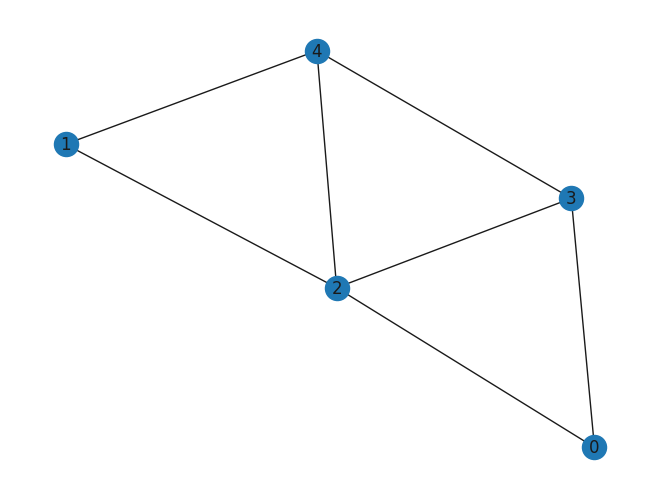

In [ ]:
nNodes = 5
mEdges = 7

G0 = nx.gnm_random_graph(nNodes, mEdges)
# G0 = nx.barabasi_albert_graph(nNodes, 5)
A = nx.to_numpy_array(G0)

nx.draw(G0, labels = {x:x for x in G0.nodes()})

In [ ]:
A

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0.]])

In [ ]:
M11 = -sp.sparse.kron(A, A) - sp.sparse.kron(A.transpose(), A) # P n^2 x n^2
M12 = -sp.sparse.kron(sp.sparse.eye(nNodes), np.ones((nNodes, 1))) # mu n^2 x n
M13 = -sp.sparse.eye(nNodes * nNodes) # lambda n^2 x n^2

b1 = np.zeros(nNodes * nNodes)

M1 = sp.sparse.hstack([M11, M12, M13])

In [ ]:
# Lambda equality
M21 = sp.sparse.csr_matrix(((nNodes - 1) * nNodes, nNodes * nNodes))
M22 = sp.sparse.csr_matrix(((nNodes - 1) * nNodes, nNodes))
M23 = sp.sparse.kron(sp.sparse.hstack([np.ones((nNodes - 1, 1)), -sp.sparse.eye(nNodes - 1)]), sp.sparse.eye(nNodes))

b2 = np.zeros((nNodes - 1) * nNodes)
M2 = sp.sparse.hstack([M21, M22, M23])

#b2 = np.zeros(0)
#M2 = sp.sparse.csr_matrix((0, 2 * nNodes*nNodes + nNodes))


In [ ]:
# Constraints
## Row sums
M31 = sp.sparse.kron(np.ones(nNodes), sp.sparse.eye(nNodes))
M32 = sp.sparse.csr_matrix((nNodes, nNodes))
M33 = sp.sparse.csr_matrix((nNodes, nNodes * nNodes))
b3 = np.ones(nNodes)

M3 = sp.sparse.hstack([M31, M32, M33])

## Columns sums
M41 = sp.sparse.kron(sp.sparse.eye(nNodes), np.ones(nNodes))
M42 = sp.sparse.csr_matrix((nNodes, nNodes))
M43 = sp.sparse.csr_matrix((nNodes, nNodes * nNodes))
b4 = np.ones(nNodes)

M4 = sp.sparse.hstack([M41, M42, M43])

In [ ]:
M = sp.sparse.vstack([M1, M2, M3, M4])
M

<55x55 sparse matrix of type '<class 'numpy.float64'>'
	with 490 stored elements in COOrdinate format>

In [ ]:
b = np.hstack([b1, b2, b3, b4])
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [ ]:
sp.sparse.linalg.eigsh(M)

(array([-16.95266686,  -5.64863439,   8.7324191 ,   8.90695439,
          9.37263491,   9.7286598 ]),
 array([[ 1.21258481e-01,  1.65273579e-01, -1.88565490e-01,
         -1.29452779e-01, -1.27158292e-01,  8.44753571e-02],
        [ 1.24492152e-01, -1.56279514e-01, -1.64705857e-01,
         -1.28792593e-01,  1.26428429e-01,  1.41427157e-01],
        [ 1.86898643e-01,  5.34222873e-02,  2.08318591e-01,
         -2.61165084e-01, -4.48310149e-02,  2.23142714e-01],
        [ 1.60433403e-01, -2.33743898e-01, -6.82590296e-02,
         -1.86652071e-01,  1.85103485e-01,  2.18730703e-01],
        [ 1.59843945e-01,  2.74559752e-01, -1.09186872e-01,
         -1.96944787e-01, -2.19119805e-01,  1.20758494e-01],
        [ 1.19742597e-01, -9.10582160e-02, -1.68571615e-01,
         -1.39600563e-01, -8.20585027e-02, -1.46561087e-01],
        [ 1.27513646e-01,  1.21044222e-01, -1.49886428e-01,
         -1.08111889e-01,  1.80283318e-01, -1.19575484e-01],
        [ 1.95248491e-01, -7.23084736e-02,  2.45635

In [ ]:
G = -sp.sparse.kron(A, A) - sp.sparse.kron(A.transpose(), A) # P n^2 x n^2
A1 = sp.sparse.kron(np.ones(nNodes), sp.sparse.eye(nNodes))
A2 = sp.sparse.kron(sp.sparse.eye(nNodes), np.ones(nNodes))
B = sp.sparse.vstack([A1, A2])

K = sp.sparse.vstack(
    [
        sp.sparse.hstack([G, B.transpose()]),
        sp.sparse.hstack([B, sp.sparse.csr_matrix((2 * nNodes, 2 * nNodes))])
    ]
)

b = np.hstack([np.zeros(nNodes * nNodes), np.ones(2 * nNodes)])

In [ ]:
x, exit_code = sp.sparse.linalg.gmres(K, b)
P = x[:nNodes * nNodes].reshape((nNodes, nNodes))
P[1]

array([1.44954541e-16, 1.44954541e-16, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01])

In [ ]:
sp.sparse.linalg.spsolve(K, b)

/home/dkubek/.conda/envs/approx/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/home/dkubek/.conda/envs/approx/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:276: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
np.linalg.matrix_rank(K.toarray())

34

In [ ]:
sp.sparse.linalg.eigsh(K)

(array([-17.77822605,  -5.23606798,   9.1881794 ,   9.18981144,
          9.98457393,   9.98457393]),
 array([[ 1.21859921e-01,  1.38196601e-01,  1.06037258e-12,
         -2.10251629e-01,  1.45348398e-01,  1.09327738e-01],
        [ 1.21859921e-01, -1.38196601e-01,  1.06038412e-12,
         -2.10251629e-01, -1.09327738e-01,  1.45348398e-01],
        [ 1.93323534e-01, -1.27233819e-15, -3.51774670e-01,
          2.28388771e-02,  2.82560581e-02,  1.99778232e-01],
        [ 1.62723210e-01, -2.23606798e-01, -1.05012531e-01,
         -1.72736707e-01, -1.82189723e-01,  1.97750524e-01],
        [ 1.62723210e-01,  2.23606798e-01, -1.05012531e-01,
         -1.72736707e-01,  2.29884922e-01,  1.39467872e-01],
        [ 1.21859921e-01, -1.38196601e-01,  1.06045258e-12,
         -2.10251629e-01,  1.09327738e-01, -1.45348398e-01],
        [ 1.21859921e-01,  1.38196601e-01,  1.06020173e-12,
         -2.10251629e-01, -1.45348398e-01, -1.09327738e-01],
        [ 1.93323534e-01,  1.35440228e-15, -3.51774